In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [4]:
from sklearn.cluster import KMeans

In [25]:
kospi=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/stock_dataset/kospi_high_low_preprocessed_final.csv',encoding='cp949',index_col=0)

In [26]:
kospi

,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-03,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29
한화생명,0.015021,0.032120,0.037363,0.024775,0.022523,0.015453,0.020045,0.022272,0.061538,0.035270,0.023404,0.019068,0.023207,0.021008,0.014706,0.014894,0.017021,0.025316,0.017021,0.017279,0.013072,0.021978,0.022321,0.036199,0.027714,0.023202,0.029817,0.024943,0.013423,0.028953,0.022883,0.017978,0.018141,0.013544,0.013575,0.047404,0.023641,0.037383,0.030806,0.024390,...,0.027304,0.029801,0.030508,0.036789,0.061644,0.042071,0.047319,0.066265,0.061947,0.080495,0.063973,0.057508,0.033113,0.030405,0.081356,0.031646,0.041401,0.029703,0.039216,0.055738,0.043344,0.018868,0.034700,0.028939,0.056604,0.037037,0.015773,0.022508,0.028571,0.021944,0.009524,0.015873,0.012862,0.022581,0.032573,0.026578,0.036789,0.024306,0.024055,0.047297
미래에셋대우,0.015193,0.020747,0.014986,0.016484,0.013812,0.019257,0.010840,0.012146,0.041555,0.024675,0.014455,0.013089,0.018397,0.010309,0.011613,0.012903,0.010390,0.017995,0.022021,0.018543,0.024161,0.022487,0.014865,0.029650,0.020633,0.014925,0.016194,0.041611,0.014194,0.014342,0.015464,0.015564,0.018088,0.022368,0.021992,0.054233,0.013812,0.027933,0.037975,0.027982,...,0.064838,0.076112,0.048943,0.044543,0.078320,0.054865,0.053191,0.032666,0.041139,0.062295,0.034368,0.062907,0.046563,0.033514,0.050429,0.035052,0.032461,0.041667,0.052138,0.035484,0.029197,0.023303,0.043210,0.043386,0.035197,0.040254,0.015385,0.038803,0.010650,0.017058,0.018378,0.014130,0.019715,0.056645,0.041714,0.043023,0.040230,0.024882,0.016766,0.029656
기업은행,0.012712,0.017094,0.008511,0.012766,0.012605,0.008439,0.012658,0.021097,0.028926,0.020080,0.020408,0.020408,0.008097,0.008097,0.012195,0.012048,0.008065,0.056000,0.012658,0.021277,0.017316,0.025862,0.008811,0.035088,0.026786,0.013514,0.013575,0.008969,0.013393,0.017778,0.013453,0.013333,0.008889,0.013393,0.008969,0.036036,0.014019,0.013889,0.013761,0.023256,...,0.018587,0.014634,0.029412,0.019231,0.021871,0.034524,0.036571,0.013636,0.024943,0.045977,0.030120,0.032181,0.018473,0.023199,0.019324,0.023753,0.017964,0.017032,0.027778,0.016069,0.008537,0.014599,0.018094,0.013350,0.016867,0.017011,0.008610,0.009756,0.009756,0.007317,0.006135,0.007371,0.017199,0.013665,0.016311,0.008861,0.016435,0.016688,0.014013,0.017699
SK하이닉스,0.025608,0.024142,0.028314,0.025381,0.014888,0.018797,0.011152,0.035980,0.057554,0.027523,0.058691,0.028908,0.036559,0.016026,0.021921,0.018947,0.017021,0.029536,0.023013,0.022317,0.037306,0.026882,0.014815,0.058511,0.016427,0.018163,0.030303,0.035468,0.024876,0.020534,0.026866,0.020202,0.014925,0.020202,0.027723,0.037487,0.028037,0.041879,0.042328,0.044662,...,0.013447,0.013480,0.014870,0.016010,0.026217,0.012240,0.013564,0.020757,0.012469,0.027500,0.039693,0.049333,0.072423,0.046917,0.030144,0.027273,0.017766,0.023899,0.047315,0.018642,0.019763,0.055629,0.043194,0.024173,0.022872,0.027708,0.020513,0.028683,0.021684,0.026250,0.023256,0.020757,0.020681,0.016726,0.054502,0.052248,0.037440,0.043124,0.028777,0.032491
우리금융지주,0.012876,0.021739,0.025974,0.021834,0.013216,0.021834,0.008811,0.039648,0.033898,0.032922,0.016807,0.021097,0.016878,0.012448,0.025000,0.016393,0.016598,0.053061,0.008584,0.030172,0.021739

In [27]:
kospi=kospi.fillna(kospi.mean())

In [28]:
model=KMeans(n_clusters=3,random_state=100)
model.fit(kospi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [29]:
kospi['Cluster']=model.labels_

In [30]:
kospi.to_csv('/content/gdrive/My Drive/Colab Notebooks/stock_dataset/kospi_high_low_cluster_3.csv')

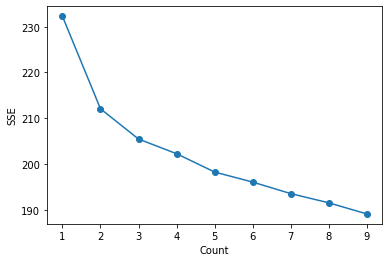

In [15]:
#model 평가
def elbow(X):
  sse=[]
  for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=1,random_state=100)
    km.fit(X)
    sse.append(km.inertia_)

  plt.plot(range(1,10),sse,marker='o')
  plt.xlabel('Count')
  plt.ylabel('SSE')
  plt.show()

elbow(kospi)

In [ ]:
#http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

In [ ]:
from sklearn.metrics import silhouette_samples

def plotSilhouette(X,y_km):
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
  y_ax_lower,y_ax_upper=0,0
  yticks=[]

  for i, c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[y_km ==c] 
    c_silhouette_vals.sort()
    y_ax_upper +=len(c_silhouette_vals)
    color=cm.jet(i/n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower+=len(c_silhouette_vals)
    silhouette_avg=np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(yticks,cluster_labels+1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()

X,y=kospi
km=KMeans(n_clusters=3,random_state=0)
y_km=km.fit_predict(X)
plotSilhouette(X,y_km)

ValueError: ignored